# thanks to betanalpha and akis post 
- [this is the link for betanalpha](https://betanalpha.github.io/assets/case_studies/gaussian_processes.html#23_Fitting_A_General_Gaussian_Process_Posterior)
- [this is the link for aki](https://avehtari.github.io/casestudies/Motorcycle/motorcycle_gpcourse.html#3_Heteroskedastic_GP_with_covariance_matrices)


In [2]:
import sys
print(sys.executable)
print(sys.version)
print(sys.version_info)

import numpy as np
import matplotlib.pyplot as plt

/opt/conda/bin/python
3.9.4 | packaged by conda-forge | (default, May 10 2021, 22:13:33) 
[GCC 9.3.0]
sys.version_info(major=3, minor=9, micro=4, releaselevel='final', serial=0)


In [3]:
import os

from cmdstanpy import CmdStanModel



# akis part
11/26/2022

## generate some random data

In [11]:
import pandas as pd
iris = pd.read_csv('/home/ubuntu/sequoia/iris_csv.csv')

In [12]:
iris.head()

,sepallength,sepalwidth,petallength,petalwidth,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [13]:
x1 = iris['sepallength']
x2 = iris['sepalwidth']
y = iris['petallength']

Text(0, 0.5, 'y')

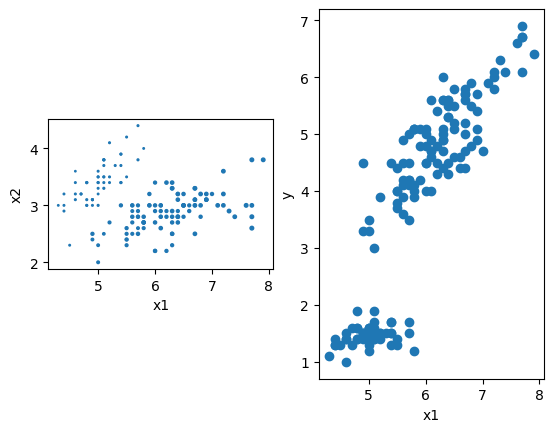

In [15]:
plt.subplot(1,2,1)
plt.scatter(x1,x2,s=list(y))
plt.gca().set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('x2')

plt.subplot(1,2,2)
plt.plot(x1,y,'o')
plt.gca().set_aspect('equal')
plt.xlabel('x1')
plt.ylabel('y')


In [16]:

simu_data = {'x':x1, "x2":x1, "y":y, "N":len(x1), "N2":len(x1)}


In [31]:
stan_file = os.path.join('stanfiles','gp_aki.stan')
model = CmdStanModel(stan_file=stan_file)
print(model)
print(model.exe_info())

17:16:55 - cmdstanpy - INFO - compiling stan file /home/ubuntu/sequoia/stanfiles/gp_aki.stan to exe file /home/ubuntu/sequoia/stanfiles/gp_aki
17:17:21 - cmdstanpy - INFO - compiled model executable: /home/ubuntu/sequoia/stanfiles/gp_aki


CmdStanModel: name=gp_aki
	 stan_file=/home/ubuntu/sequoia/stanfiles/gp_aki.stan
	 exe_file=/home/ubuntu/sequoia/stanfiles/gp_aki
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '30', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [32]:
opt = model.optimize(data=simu_data)

17:17:21 - cmdstanpy - INFO - Chain [1] start processing
17:17:21 - cmdstanpy - INFO - Chain [1] done processing


In [33]:
opt.stan_variable('sigman')

0.197872

In [34]:

fit = model.sample(data=simu_data,iter_warmup=500, iter_sampling=500,
                                  chains=4, parallel_chains=4)




17:17:37 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:17:54 - cmdstanpy - INFO - CmdStan done processing.
17:17:54 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
	Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
Exception: cholesky_decompose: A is not symmetric. A[1,18] = -nan, but A[18,1] = -nan (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 6

In [36]:
fit.draws_pd()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,lengthscale_f,sigma_f,sigman,...,f[142],f[143],f[144],f[145],f[146],f[147],f[148],f[149],f[150],sigma
0,31.7260,1.000000,0.692654,3.0,7.0,0.0,-31.1058,0.905378,0.789152,0.189477,...,5.25304,4.12182,5.13913,5.07430,5.07427,5.03929,5.05099,4.98216,4.43362,0.334317
1,31.8015,0.966910,0.692654,2.0,3.0,0.0,-31.3175,0.816073,0.937811,0.198058,...,5.48069,4.16095,5.33840,5.24459,5.24468,5.11885,5.16836,5.04976,4.48034,0.349457
2,32.0215,0.975067,0.692654,2.0,3.0,0.0,-31.4113,0.905527,1.033230,0.187474,...,5.32413,4.04921,5.26822,5.23703,5.23693,5.09339,5.19718,4.98564,4.35662,0.330783
3,30.6878,0.850246,0.692654,2.0,3.0,0.0,-30.5327,1.090310,0.672119,0.189841,...,5.37672,4.05233,5.27783,5.20079,5.20101,4.96192,5.08854,4.86321,4.32081,0.334960
4,30.4846,0.984355,0.692654,2.0,3.0,0.0,-29.4948,0.669333,0.794529,0.192227,...,5.39439,4.22324,5.30028,5.21419,5.21435,4.88572,5.03951,4.82572,4.49064,0.339169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,23.9669,0.819108,0.679666,3.0,7.0,0.0,-22.7055,2.445030,0.971825,0.170541,...,5.71704,3.87622,5.61576,5.50258,5.50255,4.91377,5.23649,4.73118,4.10589,0.300905
1996,32.0743,1.000000,0.679666,2.0,7.0,0.0,-24.5417,0.918607,0.907775,0.211118,...,5.39009,4.12832,5.24852,5.15622,5.15632,5.08392,5.09885,5.02858,4.45711,0.372501
1997,31.4106,0.906796,0.679666,3.0,7.0,0.0,-31.0419,1.381120,1.111190,0.191397,...,5.34452,4.06409,5.28442,5.23186,5.23185,4.96115,5.12261,4.84474,4.30698,0.337705
1998,30.5270,0.825773,0.679666,1.0,1.0,0.0,-30.4249,1.539890,1.161450,0.188327,...,5.45296,3.98505,5.39545,5.34126,5.34112,5.00806,5.21165,4.86465,4.24649,0.332288


In [37]:
fit.stan_variable('sigman')

array([0.189477, 0.198058, 0.187474, ..., 0.191397, 0.188327, 0.194412])

In [49]:
fit.stan_variables().keys()

dict_keys(['lengthscale_f', 'sigma_f', 'sigman', 'f', 'sigma'])

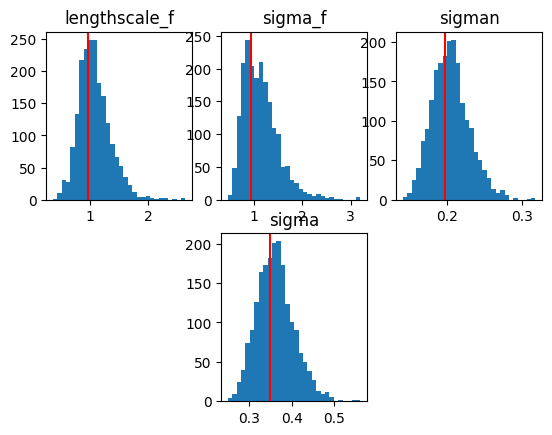

In [59]:
for i,var in enumerate(fit.stan_variables().keys()):
    if var!='f':
        plt.subplot(2,(len(fit.stan_variables().keys())+1)//2,i+1)
        plt.hist(fit.stan_variable(var),bins = 30);
        plt.axvline(opt.stan_variable(var), color = 'red')
        plt.title(var);

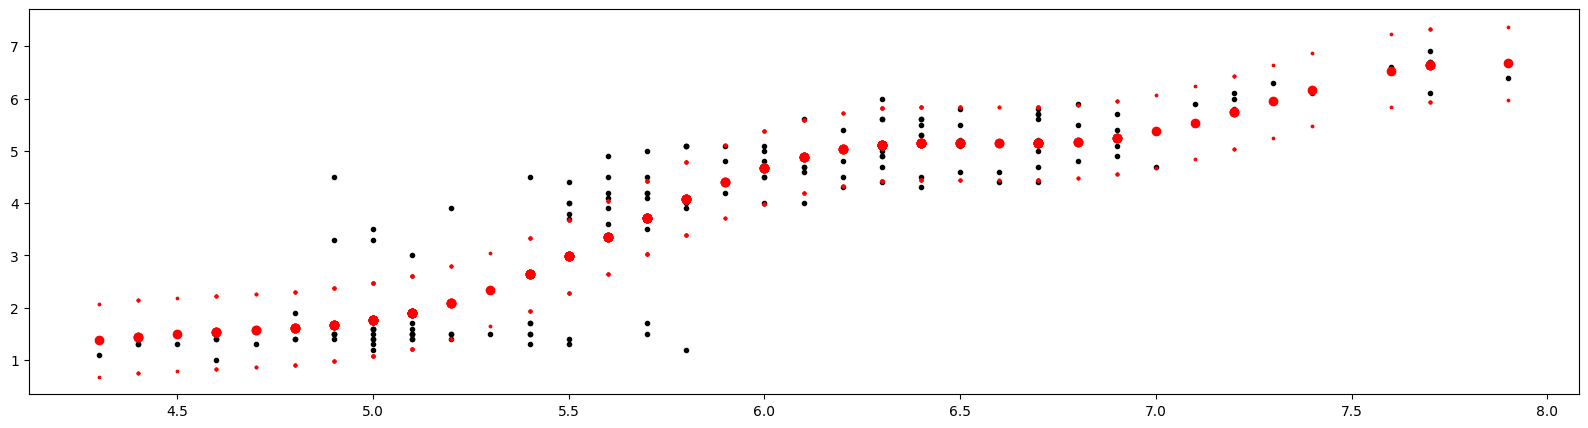

In [88]:
plt.figure(figsize = (20, 5))
plt.scatter(x1,y,marker = '.', color = 'k')
plt.scatter(x1,opt.stan_variable('f'), color = 'red', marker='o')
plt.scatter(x1,opt.stan_variable('f') -2*opt.stan_variable('sigma'),color = 'red',s = 3)
plt.scatter(x1,opt.stan_variable('f') +2*opt.stan_variable('sigma'),color = 'red',s = 3)


In [101]:
fit.stan_variable('sigma').shape

(2000,)

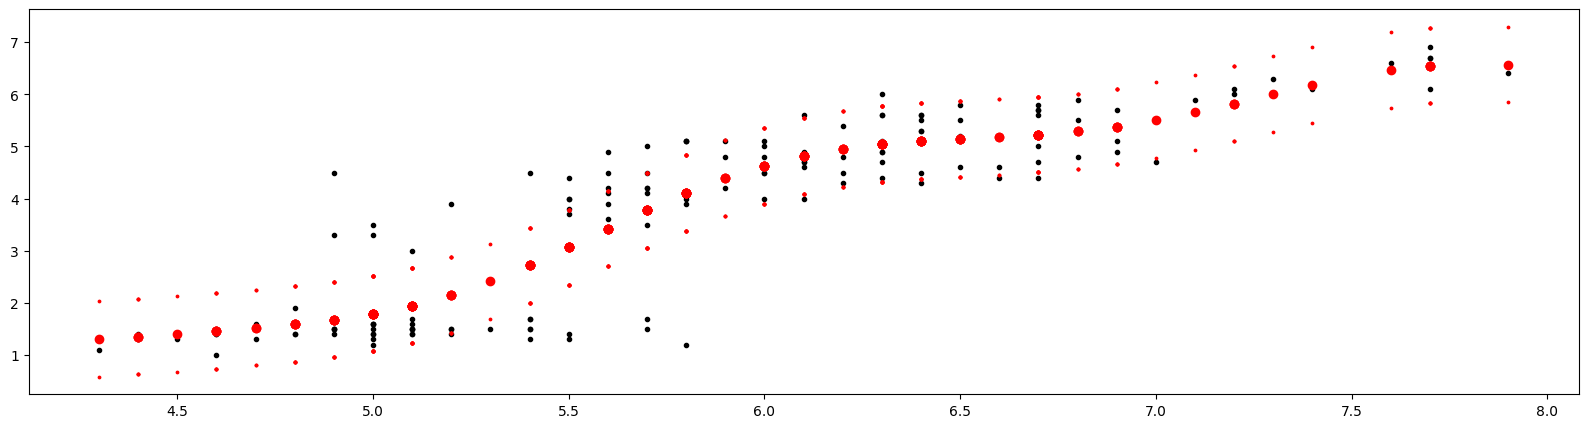

In [103]:
plt.figure(figsize = (20, 5))
plt.scatter(x1,y,marker = '.', color = 'k')
plt.scatter(x1,np.mean(fit.stan_variable('f'),0), color = 'red', marker='o')
plt.scatter(x1,np.mean(fit.stan_variable('f'),0)-2*np.mean(fit.stan_variable('sigma')),color = 'red',s = 3)
plt.scatter(x1,np.mean(fit.stan_variable('f'),0)+2*np.mean(fit.stan_variable('sigma')),color = 'red',s = 3)


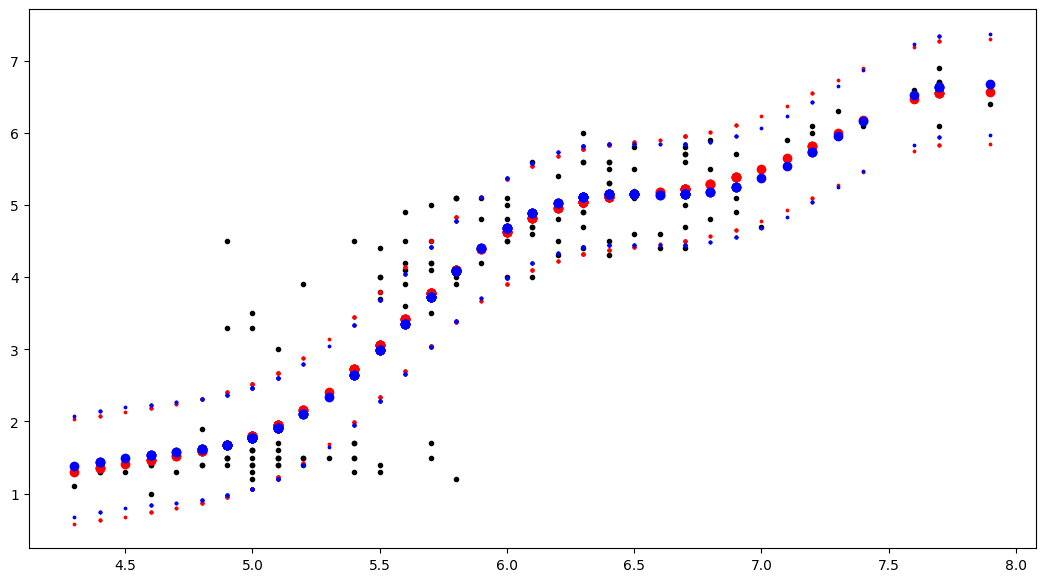

In [106]:
plt.figure(figsize = (13, 7))
plt.scatter(x1,y,marker = '.', color = 'k')
plt.scatter(x1,np.mean(fit.stan_variable('f'),0), color = 'red', marker='o')
plt.scatter(x1,np.mean(fit.stan_variable('f'),0)-2*np.mean(fit.stan_variable('sigma')),color = 'red',s = 3)
plt.scatter(x1,np.mean(fit.stan_variable('f'),0)+2*np.mean(fit.stan_variable('sigma')),color = 'red',s = 3)


plt.scatter(x1,opt.stan_variable('f'), color = 'blue', marker='o')
plt.scatter(x1,opt.stan_variable('f') -2*opt.stan_variable('sigma'),color = 'blue',s = 3)
plt.scatter(x1,opt.stan_variable('f') +2*opt.stan_variable('sigma'),color = 'blue',s = 3)


## if use partial data for training...

In [114]:
len(x1)

150

In [115]:
train_id=np.arange(0,len(x1),10)

simu_data = {'x':x1[train_id], "x2":x1, "y":y[train_id], "N":len(train_id), "N2":len(x1)}


In [116]:
stan_file = os.path.join('stanfiles','gp_aki.stan')
model = CmdStanModel(stan_file=stan_file)
print(model)
print(model.exe_info())

CmdStanModel: name=gp_aki
	 stan_file=/home/ubuntu/sequoia/stanfiles/gp_aki.stan
	 exe_file=/home/ubuntu/sequoia/stanfiles/gp_aki
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '30', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [117]:
opt = model.optimize(data=simu_data)

18:04:02 - cmdstanpy - INFO - Chain [1] start processing
18:04:02 - cmdstanpy - INFO - Chain [1] done processing


In [118]:
opt.stan_variable('sigman')

0.262734

In [119]:

fit = model.sample(data=simu_data,iter_warmup=500, iter_sampling=500,
                                  chains=4, parallel_chains=4)




18:04:04 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

18:04:05 - cmdstanpy - INFO - CmdStan done processing.
18:04:05 - cmdstanpy - WARNING - Non-fatal error during sampling:
Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
Exception: cholesky_decompose: Matrix m is not positive definite (in '/home/ubuntu/sequoia/stanfiles/gp_aki.stan', line 68, column 2 to column 63)
Consider re-running with show_console=True if the above output is unclear!


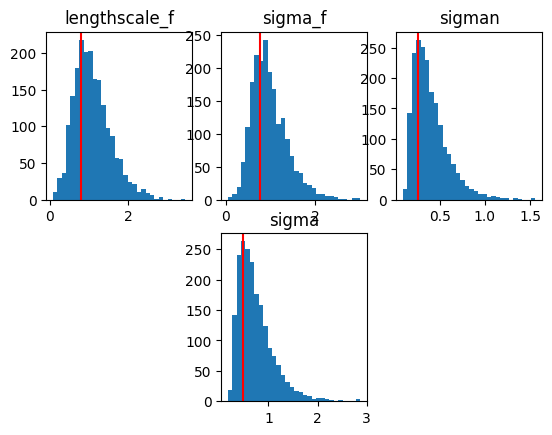

In [120]:
for i,var in enumerate(fit.stan_variables().keys()):
    if var!='f':
        plt.subplot(2,(len(fit.stan_variables().keys())+1)//2,i+1)
        plt.hist(fit.stan_variable(var),bins = 30);
        plt.axvline(opt.stan_variable(var), color = 'red')
        plt.title(var);

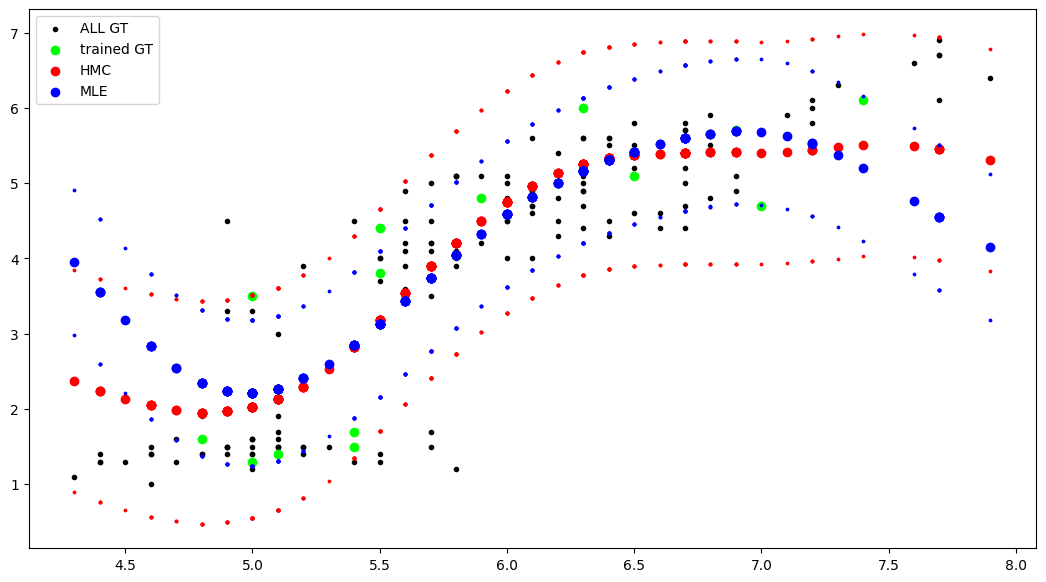

In [128]:
plt.figure(figsize = (13, 7))
plt.scatter(x1,y,marker = '.', color = 'k', label = 'ALL GT')
plt.scatter(x1[train_id],y[train_id],marker = 'o', color = 'lime', label = 'trained GT')

plt.scatter(x1,np.mean(fit.stan_variable('f'),0), color = 'red', marker='o', label = 'HMC')
plt.scatter(x1,np.mean(fit.stan_variable('f'),0)-2*np.mean(fit.stan_variable('sigma')),color = 'red',s = 3)
plt.scatter(x1,np.mean(fit.stan_variable('f'),0)+2*np.mean(fit.stan_variable('sigma')),color = 'red',s = 3)

plt.scatter(x1,opt.stan_variable('f'), color = 'blue', marker='o', label = 'MLE')
plt.scatter(x1,opt.stan_variable('f') -2*opt.stan_variable('sigma'),color = 'blue',s = 3)
plt.scatter(x1,opt.stan_variable('f') +2*opt.stan_variable('sigma'),color = 'blue',s = 3)

plt.legend()

# betanalpha part


In [22]:
stan_file

'stanfiles/gp_aki.stan'

In [23]:
stan_file = os.path.join('stanfiles','simulate_GP.stan')
model = CmdStanModel(stan_file=stan_file)

print(model)

print(model.exe_info())

CmdStanModel: name=simulate_GP
	 stan_file=/home/ubuntu/sequoia/stanfiles/simulate_GP.stan
	 exe_file=/home/ubuntu/sequoia/stanfiles/simulate_GP
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '30', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [24]:

N = 551
x = 22 * (np.arange(N))/(N-1) - 11  # covariate grid
alpha_true = 3
rho_true = 5.5
simu_data = {'N':N, "x":x, "alpha":alpha_true, "rho":rho_true}
sigma_true=2
simu_data['sigma'] = sigma_true
fit = model.sample(data=simu_data)

17:08:08 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

17:08:09 - cmdstanpy - INFO - CmdStan done processing.


In [25]:
y_all = fit.stan_variable('y')
f_all = fit.stan_variable('f')

In [68]:
y_all.shape, f_all.shape

((4000, 551), (4000, 551))

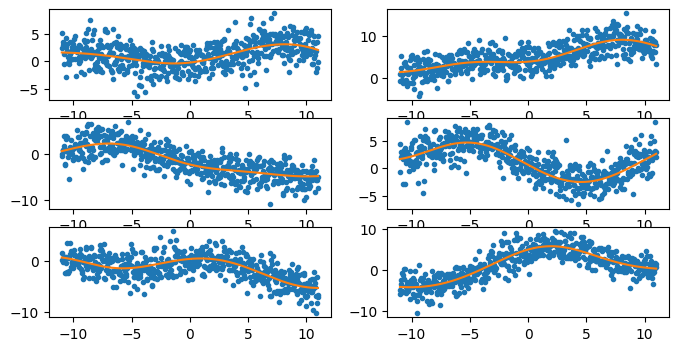

In [69]:
plt.figure(figsize = (8, 4))
for i in range(6):
    plt.subplot(3,2,i+1)
    plt.plot(x,y_all[i], '.')
    plt.plot(x,f_all[i])

In [70]:
y_all.shape

(4000, 551)

In [71]:
f  = f_all[0]
y  = y_all[0]


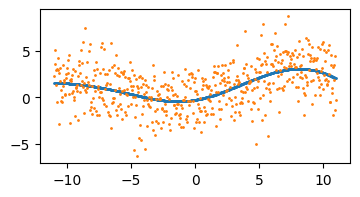

In [72]:
plt.figure(figsize = (4,2))
plt.scatter(x,f, s =1)
plt.scatter(x,y, s=1)

In [73]:
observed_idx = np.array(50 * np.arange(10) + 26)
N_obs = len(observed_idx)
x_obs = x[observed_idx]
y_obs = y[observed_idx]

In [74]:
N_predict = N
x_predict = x
y_predict = y


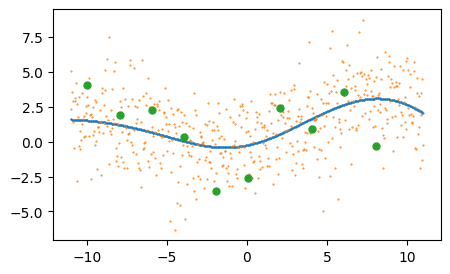

In [75]:
plt.figure(figsize = (5,3))
plt.plot(x,f,'.',markersize= 1)
plt.plot(x_predict, y_predict, '.', markersize= 1)
plt.plot(x_obs, y_obs, '.', markersize= 10)

In [76]:
file1 = {'N_obs':N_obs, 
         "x_obs":x_obs,
         'y_obs':y_obs,
         "N_predict":N_predict, 
         "x_predict":x_predict, 
         "y_predict":y_predict,
         "observed_idx":observed_idx
        }

file2 = {
    'f':f,
    'x':x    
}

In [77]:

import pickle

In [78]:
pickle.dump(file1, file = open('./output/normal.data.pkl', 'wb'))
pickle.dump(file2, file = open('./output/gp_truth.pkl', 'wb'))

# fit the model

In [89]:
truth  = pickle.load(open('./output/gp_truth.pkl', 'rb'))
data = pickle.load(open('./output/normal.data.pkl', 'rb'))


data['alpha'] = alpha_true
data['rho'] = rho_true
data['sigma'] = sigma_true

In [90]:
data.keys()

dict_keys(['N_obs', 'x_obs', 'y_obs', 'N_predict', 'x_predict', 'y_predict', 'observed_idx', 'alpha', 'rho', 'sigma'])

In [114]:
stan_file = os.path.join('stanfiles','fit_normal.stan')
model = CmdStanModel(stan_file=stan_file)

normal_fit = model.sample(data=data)

01:49:47 - cmdstanpy - INFO - compiling stan file /home/ubuntu/sequoia/stanfiles/fit_normal.stan to exe file /home/ubuntu/sequoia/stanfiles/fit_normal
01:50:09 - cmdstanpy - INFO - compiled model executable: /home/ubuntu/sequoia/stanfiles/fit_normal
01:50:09 - cmdstanpy - WARNING - Stan compiler has produced 5 warnings:
01:50:09 - cmdstanpy - WARNING - 
--- Translating Stan model to C++ code ---
bin/stanc  --o=/home/ubuntu/sequoia/stanfiles/fit_normal.hpp /home/ubuntu/sequoia/stanfiles/fit_normal.stan
Warning in '/home/ubuntu/sequoia/stanfiles/fit_normal.stan', line 3, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/home/ubuntu/sequoia/stanfiles/fit_normal.stan', line 6, column 2: Declaration
    of arrays by placing brackets after a variable name is deprecated and
  

chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

01:50:18 - cmdstanpy - INFO - CmdStan done processing.


```
samples <- extract(fit)
I <- length(samples$f_predict[,1])

plot_idx <- seq(1, I, 80)
N <- length(plot_idx)
line_colors <- colormap(colormap=nom_colors, nshades=N)

plot(1, type="n", xlab="x", ylab="f", main=title,
   xlim=c(-11, 11), ylim=c(-12, 12))
for (n in 1:N)
lines(data$x_predict, samples$f_predict[plot_idx[n],], col=line_colors[n], lwd=2)

lines(true$x, true$f, lwd=4, xlab="x", ylab="f", col="white")
lines(true$x, true$f, lwd=2, xlab="x", ylab="f", col="black")

```

Text(0.5, 1.0, 'Posterior Realizations')

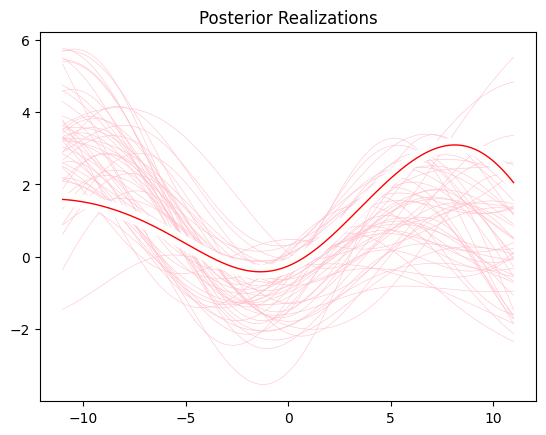

In [142]:
I = len(normal_fit.stan_variable('f_predict'))
plot_idx = np.arange(0, I, 80)
p = len(plot_idx)
for n in range(p):
    plt.plot(data['x_predict'],
             normal_fit.stan_variable('f_predict')[plot_idx[n]], lw=.4, color = 'pink')
plt.plot(truth['x'],truth['f'], lw =10, color = 'white')
plt.plot(truth['x'],truth['f'], lw =1, color = 'red')
plt.title("Posterior Realizations")

  # older

In [4]:
stan_file = os.path.join('stanfiles','bernoulli.stan')


model = CmdStanModel(stan_file=stan_file)

print(model)

print(model.exe_info())

CmdStanModel: name=bernoulli
	 stan_file=/home/ubuntu/sequoia/stanfiles/bernoulli.stan
	 exe_file=/home/ubuntu/sequoia/stanfiles/bernoulli
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '30', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [5]:
data_file = os.path.join('stanfiles', 'bernoulli.data.json')

fit = model.sample(data=data_file)
                                                                                                                                                                                                                                                                                                                                

22:48:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:48:03 - cmdstanpy - INFO - CmdStan done processing.


In [6]:
print(fit.stan_variable('theta'))

print(fit.draws_pd('theta')[:3])

# print(fit.draws_xr('theta'))


[0.142046 0.249416 0.351906 ... 0.272498 0.122772 0.257947]
      theta
0  0.142046
1  0.249416
2  0.351906


In [7]:
fit.draws_pd()


,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-7.23365,0.932649,0.99643,1.0,3.0,0.0,7.23520,0.142046
1,-6.74803,0.996858,0.99643,2.0,3.0,0.0,7.22046,0.249416
2,-7.03665,0.924047,0.99643,1.0,3.0,0.0,7.05457,0.351906
3,-6.78722,0.989617,0.99643,1.0,3.0,0.0,7.06449,0.216134
4,-6.93053,0.961148,0.99643,1.0,1.0,0.0,6.93064,0.179987
...,...,...,...,...,...,...,...,...
3995,-6.84442,0.976124,1.04882,2.0,3.0,0.0,6.89998,0.307362
3996,-7.09978,0.968044,1.04882,2.0,3.0,0.0,7.10746,0.363145
3997,-6.76362,0.871747,1.04882,2.0,3.0,0.0,7.67381,0.272498
3998,-7.47118,0.879190,1.04882,2.0,3.0,0.0,7.51542,0.122772


In [8]:
print(fit.metric)


[[0.573566]
 [0.555595]
 [0.580434]
 [0.452911]]


In [9]:
fit.summary()

,Mean,MCSE,StdDev,5%,50%,95%,N_Eff,N_Eff/s,R_hat
lp__,-7.283610,0.020405,0.763801,-8.807790,-6.990430,-6.750310,1401.18,32585.6,1.000710
theta,0.247439,0.003183,0.119087,0.075382,0.233975,0.461277,1400.14,32561.3,0.999925


In [10]:
print(fit.diagnose())

Processing csv files: /tmp/tmpf24czwxu/bernoullii0zpkntu/bernoulli-20221123224803_1.csv, /tmp/tmpf24czwxu/bernoullii0zpkntu/bernoulli-20221123224803_2.csv, /tmp/tmpf24czwxu/bernoullii0zpkntu/bernoulli-20221123224803_3.csv, /tmp/tmpf24czwxu/bernoullii0zpkntu/bernoulli-20221123224803_4.csv

Checking sampler transitions treedepth.
Treedepth satisfactory for all transitions.

Checking sampler transitions for divergences.
No divergent transitions found.

Checking E-BFMI - sampler transitions HMC potential energy.
E-BFMI satisfactory.

Effective sample size satisfactory.

Split R-hat values satisfactory all parameters.

Processing complete, no problems detected.



# test GP here 

In [11]:
import numpy as np

In [12]:

stan_file = os.path.join('stanfiles','gp_model.stan')
model = CmdStanModel(stan_file=stan_file)
print(model)
print(model.exe_info())


CmdStanModel: name=gp_model
	 stan_file=/home/ubuntu/sequoia/stanfiles/gp_model.stan
	 exe_file=/home/ubuntu/sequoia/stanfiles/gp_model
	 compiler_options=stanc_options={}, cpp_options={}
{'stan_version_major': '2', 'stan_version_minor': '30', 'stan_version_patch': '0', 'STAN_THREADS': 'false', 'STAN_MPI': 'false', 'STAN_OPENCL': 'false', 'STAN_NO_RANGE_CHECKS': 'false', 'STAN_CPP_OPTIMS': 'false'}


In [13]:

N = 551
x = 22 * (np.arange(N))/(N-1) - 11  # covariate grid
alpha_true = 3
rho_true = 5.5
simu_data = {'N':N, "x":x, "alpha":alpha_true, "rho":rho_true}
simu_data['sigma'] = 2
# data_file = os.path.join('stanfiles', 'bernoulli.data.json')

fit = model.sample(data=simu_data)

22:48:03 - cmdstanpy - INFO - CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

22:48:04 - cmdstanpy - INFO - CmdStan done processing.


In [14]:
fit.draws_pd().shape


(4000, 1104)

In [15]:
fit.draws_pd().head()

,lp__,accept_stat__,f[1],f[2],f[3],f[4],f[5],f[6],f[7],f[8],...,y[542],y[543],y[544],y[545],y[546],y[547],y[548],y[549],y[550],y[551]
0,0.0,0.0,-0.356498,-0.370391,-0.384396,-0.398535,-0.412800,-0.427135,-0.441590,-0.456121,...,-10.451800,-7.35625,-5.85113,-7.740830,-1.476530,-6.988280,-6.47273,-6.96267,-2.865410,-5.92463
1,0.0,0.0,-2.361190,-2.359240,-2.357280,-2.355300,-2.353310,-2.351300,-2.349280,-2.347240,...,2.047040,3.00350,2.83050,6.825640,4.450680,-1.049350,5.14790,5.15187,3.610850,3.63160
2,0.0,0.0,-2.558210,-2.553870,-2.549590,-2.545400,-2.541250,-2.537140,-2.533120,-2.529130,...,-4.296640,-2.76155,3.79628,0.743797,-1.824910,-0.496821,-5.15332,1.09926,0.330691,-2.89583
3,0.0,0.0,-1.891340,-1.887530,-1.883930,-1.880550,-1.877360,-1.874420,-1.871690,-1.869160,...,1.461220,3.47357,3.05511,7.364600,1.092320,6.358390,2.98042,5.85802,2.672990,5.14751
4,0.0,0.0,-0.577681,-0.588299,-0.598520,-0.608323,-0.617715,-0.626672,-0.635238,-0.643374,...,-0.301455,-2.94907,-4.63113,-4.996540,-0.321256,-0.726746,-0.47741,-4.11300,-4.871590,-2.22495


```

f <- extract(simu_fit)$f[1,]
y <- extract(simu_fit)$y[1,]

c_mid_teal="#487575"

plot(x, f, type="l", lwd=2, xlab="x", ylab="y",
     xlim=c(-11, 11), ylim=c(-10, 10))
points(x, y, col="white", pch=16, cex=0.6)
points(x, y, col=c_mid_teal, pch=16, cex=0.4)
```